In [1]:
# PNN and SkewPNN on Toy Dataset with numerical values

import numpy as np
from scipy.stats import norm, skew

# Define Gaussian and Skew Normal Kernels
def gaussian_kernel(distance, sigma=1.0):
    return np.exp(-distance**2 / (2 * sigma**2))

def skew_normal_kernel(distance, omega=1.0, alpha=0.0):
    kdf = np.exp(-distance**2 / (2 * sigma**2))
    # pdf = norm.pdf(distance / omega)
    cdf = norm.cdf(alpha * (distance / omega))
    return 2 * kdf * cdf

# Training data: [feature1, feature2, class]
training_data = np.array([
    [2.0, 2.0, 0], [2.2, 2.2, 0], [2.4, 2.4, 0], [2.6, 2.6, 0],
    [2.8, 2.8, 0], [1.8, 1.8, 0], [1.9, 2.1, 0], [2.3, 2.1, 0],
    [4.0, 4.0, 1], [4.1, 4.1, 1]
])

# Query point
query_point = np.array([3.5, 3.5])

# Calculate distances and kernel values
sigma = 1.0
omega = 1.0
alpha = -2.0

results = []
for data_point in training_data:
    distance = np.linalg.norm(query_point - data_point[:2])
    gaussian_value = gaussian_kernel(distance, sigma)
    skew_value = skew_normal_kernel(distance, omega, alpha)
    results.append((data_point[2], distance, gaussian_value, skew_value))

# Aggregate results by class
class_0_gaussian = sum(row[2] for row in results if row[0] == 0)
class_1_gaussian = sum(row[2] for row in results if row[0] == 1)
class_0_skew = sum(row[3] for row in results if row[0] == 0)
class_1_skew = sum(row[3] for row in results if row[0] == 1)

print(class_0_gaussian, class_1_gaussian, class_0_skew, class_1_skew)

# Probability of the input belonging to each class
prob_class_0_gaussian = class_0_gaussian / (class_0_gaussian + class_1_gaussian)
prob_class_1_gaussian = class_1_gaussian / (class_0_gaussian + class_1_gaussian)
prob_class_0_skew = class_0_skew / (class_0_skew + class_1_skew)
prob_class_1_skew = class_1_skew / (class_0_skew + class_1_skew)

print(prob_class_0_gaussian, prob_class_1_gaussian, prob_class_0_skew, prob_class_1_skew)

# Predict the class with the highest probability
predicted_class_gaussian = 0 if prob_class_0_gaussian > prob_class_1_gaussian else 1
predicted_class_skew = 0 if prob_class_0_skew > prob_class_1_skew else 1

print(f"Predicted class: {predicted_class_gaussian}")
print(f"Predicted class: {predicted_class_skew}")


1.9882107098110808 1.4764771091424362 0.03472956560401427 0.18507655979594764
0.5738498859650809 0.42615011403491904 0.15800089984216742 0.8419991001578326
Predicted class: 0
Predicted class: 1


In [108]:
results

[(0.0, 2.1213203435596424, 0.10539922456186439, 2.3283212538370987e-06),
 (0.0, 1.8384776310850233, 0.18451952399298935, 4.355295818395858e-05),
 (0.0, 1.5556349186104046, 0.2981972794298874, 0.000555495698054237),
 (0.0, 1.2727922061357855, 0.44485806622294116, 0.004853178345791173),
 (0.0, 0.9899494936611668, 0.6126263941844159, 0.02923139502874965),
 (0.0, 2.4041630560342613, 0.055576212611483114, 8.458662672770064e-08),
 (0.0, 2.12602916254693, 0.104350484754765, 2.2102963987952776e-06),
 (0.0, 1.8439088914585775, 0.1826835240527346, 4.1320368955894154e-05),
 (1.0, 0.7071067811865476, 0.7788007830714049, 0.12250474562727302),
 (1.0, 0.8485281374238566, 0.6976763260710314, 0.06257181416867462)]

In [2]:
# KNN, SVM, MLP on Toy Dataset with numerical values

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Dataset
training_data = np.array([
    [2.0, 2.0, 0], [2.2, 2.2, 0], [2.4, 2.4, 0], [2.6, 2.6, 0],
    [2.8, 2.8, 0], [1.8, 1.8, 0], [1.9, 2.1, 0], [2.3, 2.1, 0],
    [4.0, 4.0, 1], [4.1, 4.1, 1]
])

query_point = np.array([[3.5, 3.5]])

# Separate features and labels
X = training_data[:, :2]
y = training_data[:, 2]

# 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn_prediction = knn.predict(query_point)

# 2. Support Vector Machine (SVM)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X, y)
svm_prediction = svm.predict(query_point)

# 3. Neural Network (MLP)
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)
nn.fit(X, y)
nn_prediction = nn.predict(query_point)

# Print Results
print("Query Point:", query_point[0])
print(f"KNN Prediction: {knn_prediction[0]}")
print(f"SVM Prediction: {svm_prediction[0]}")
print(f"Neural Network Prediction: {nn_prediction[0]}")


Query Point: [3.5 3.5]
KNN Prediction: 1.0
SVM Prediction: 1.0
Neural Network Prediction: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


<ipython-input-3-ef63c568e260>:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(query_point[0], query_point[1], color='black', s=100, edgecolors='k', marker='x', label='Query Point')


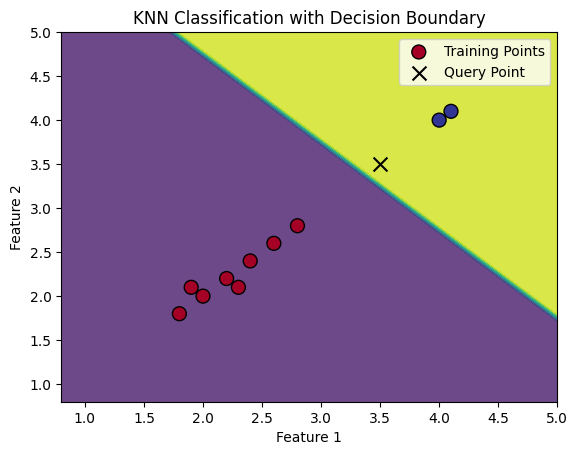

KNN Prediction for the query point [3.5 3.5]: 1.0


In [3]:
# Decision Boudary for KNN classifier on Toy Dataset with numerical values

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Example dataset
training_data = np.array([
    [2.0, 2.0, 0], [2.2, 2.2, 0], [2.4, 2.4, 0], [2.6, 2.6, 0],
    [2.8, 2.8, 0], [1.8, 1.8, 0], [1.9, 2.1, 0], [2.3, 2.1, 0],
    [4.0, 4.0, 1], [4.1, 4.1, 1]
])

# Separate features and labels
X = training_data[:, :2]  # Features (first two columns)
y = training_data[:, 2]   # Labels (last column)

# Query point
query_point = np.array([3.5, 3.5])  # Point for prediction

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for the entire mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, label='Training Points')

# Plot the query point
plt.scatter(query_point[0], query_point[1], color='black', s=100, edgecolors='k', marker='x', label='Query Point')

# Title and labels
plt.title("KNN Classification with Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Print KNN Prediction for the query point
knn_prediction = knn.predict(query_point.reshape(1, -1))
print(f"KNN Prediction for the query point {query_point}: {knn_prediction[0]}")


<ipython-input-4-861f2bf48a22>:54: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(query_point[0], query_point[1], c='black', s=100, edgecolors='k', marker='x', label='Query Point (Predicted Class: {})'.format(predicted_class))


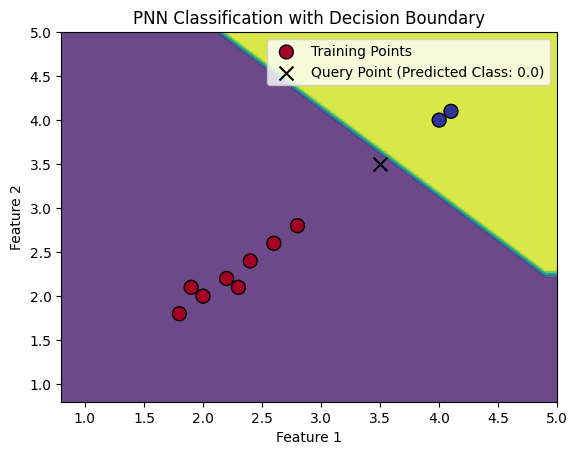

In [4]:
# Decision Boudary for PNN classifier on Toy Dataset with numerical values


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example dataset
training_data = np.array([
    [2.0, 2.0, 0], [2.2, 2.2, 0], [2.4, 2.4, 0], [2.6, 2.6, 0],
    [2.8, 2.8, 0], [1.8, 1.8, 0], [1.9, 2.1, 0], [2.3, 2.1, 0],
    [4.0, 4.0, 1], [4.1, 4.1, 1]
])

# Separate features and labels
X = training_data[:, :2]  # Features (first two columns)
y = training_data[:, 2]   # Labels (last column)

# Gaussian Kernel Function (based on provided formula)
def gaussian_kernel(distance, sigma=1.0):
    return np.exp(-distance**2 / (2 * sigma**2))

# PNN Prediction (sum of kernel values for each class)
def pnn_predict(X_train, y_train, x_test, sigma=1.0):
    # Calculate kernel values for each training point
    kernel_values = np.array([gaussian_kernel(np.linalg.norm(x_test - xi), sigma) for xi in X_train])

    # Compute the sum of kernel values for each class
    unique_classes = np.unique(y_train)
    class_sums = {cls: np.sum(kernel_values[y_train == cls]) for cls in unique_classes}

    # Return the class with the highest kernel sum (decision rule)
    return max(class_sums, key=class_sums.get)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for the entire mesh grid using PNN
Z = np.array([pnn_predict(X, y, np.array([xx[i, j], yy[i, j]]), sigma=1.0) for i in range(xx.shape[0]) for j in range(xx.shape[1])])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, label='Training Points')

# Add the query point (test point) to the plot as a black "X"
query_point = np.array([3.5, 3.5])
predicted_class = pnn_predict(X, y, query_point, sigma=1.0)
plt.scatter(query_point[0], query_point[1], c='black', s=100, edgecolors='k', marker='x', label='Query Point (Predicted Class: {})'.format(predicted_class))

# Title and labels
plt.title("PNN Classification with Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the legend
plt.legend()

# Display the plot
plt.show()


<ipython-input-6-caf523613b36>:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


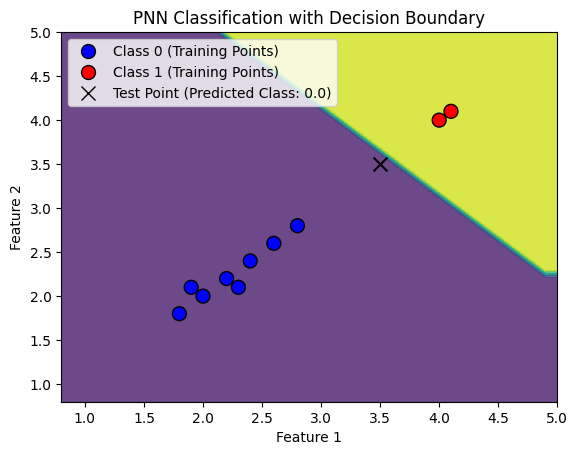

In [6]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training data points with different colors based on class
train_colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(
    X[:, 0], X[:, 1], c=train_colors, s=100, edgecolors='k', marker='o'
)

# Plot the query point with a specific color
plt.scatter(
    query_point[0], query_point[1],
    c='black', s=100, edgecolors='k', marker='x'
)

# Add a custom legend without extra lines
train_class_0 = mlines.Line2D([], [], color='blue', marker='o', markersize=10,
                               label='Class 0 (Training Points)', markeredgecolor='k', linestyle='None')
train_class_1 = mlines.Line2D([], [], color='red', marker='o', markersize=10,
                               label='Class 1 (Training Points)', markeredgecolor='k', linestyle='None')
test_point_marker = mlines.Line2D([], [], color='green', marker='x', markersize=10,
                                  label='Test Point (Predicted Class: {})'.format(predicted_class), markeredgecolor='k', linestyle='None')

plt.legend(handles=[train_class_0, train_class_1, test_point_marker], loc='upper left')

# Title and labels
plt.title("PNN Classification with Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Display the plot
plt.show()


<ipython-input-7-5c83e9868db3>:57: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(query_point[0], query_point[1], c='black', s=100, edgecolors='k', marker='x', label='Test Point (Predicted Class: {})'.format(predicted_class))


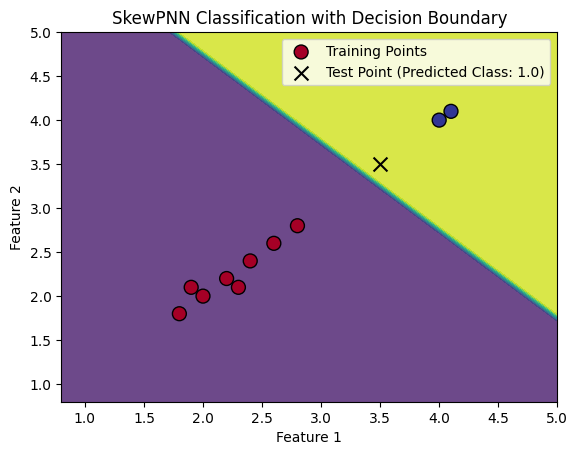

In [7]:
# Decision Boudary for SkewPNN classifier on Toy Dataset with numerical values

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Example dataset
training_data = np.array([
    [2.0, 2.0, 0], [2.2, 2.2, 0], [2.4, 2.4, 0], [2.6, 2.6, 0],
    [2.8, 2.8, 0], [1.8, 1.8, 0], [1.9, 2.1, 0], [2.3, 2.1, 0],
    [4.0, 4.0, 1], [4.1, 4.1, 1]
])

# Separate features and labels
X = training_data[:, :2]  # Features (first two columns)
y = training_data[:, 2]   # Labels (last column)

# Skew Normal Kernel Function (based on provided formula)
def skew_normal_kernel(distance, omega=1.0, alpha=-2.0):
    kdf = np.exp(-distance**2 / (2 * omega**2))  # Gaussian component
    cdf = norm.cdf(alpha * (distance / omega))  # CDF component for skewness
    return 2 * kdf * cdf  # Skew Normal Kernel

# PNN Prediction (sum of kernel values for each class)
def pnn_predict(X_train, y_train, x_test, omega=1.0, alpha=-2.0):
    # Calculate kernel values for each training point
    kernel_values = np.array([skew_normal_kernel(np.linalg.norm(x_test - xi), omega, alpha) for xi in X_train])

    # Compute the sum of kernel values for each class
    unique_classes = np.unique(y_train)
    class_sums = {cls: np.sum(kernel_values[y_train == cls]) for cls in unique_classes}

    # Return the class with the highest kernel sum (decision rule)
    return max(class_sums, key=class_sums.get)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for the entire mesh grid using PNN
Z = np.array([pnn_predict(X, y, np.array([xx[i, j], yy[i, j]]), omega=1.0, alpha=-2.0) for i in range(xx.shape[0]) for j in range(xx.shape[1])])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, label='Training Points')

# Add the query point (test point) to the plot as a black "X"
query_point = np.array([3.5, 3.5])
predicted_class = pnn_predict(X, y, query_point, omega=1.0, alpha=-2.0)
plt.scatter(query_point[0], query_point[1], c='black', s=100, edgecolors='k', marker='x', label='Test Point (Predicted Class: {})'.format(predicted_class))

# Title and labels
plt.title("SkewPNN Classification with Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the legend
plt.legend()

# Display the plot
plt.show()


<ipython-input-9-45b340dbda1a>:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


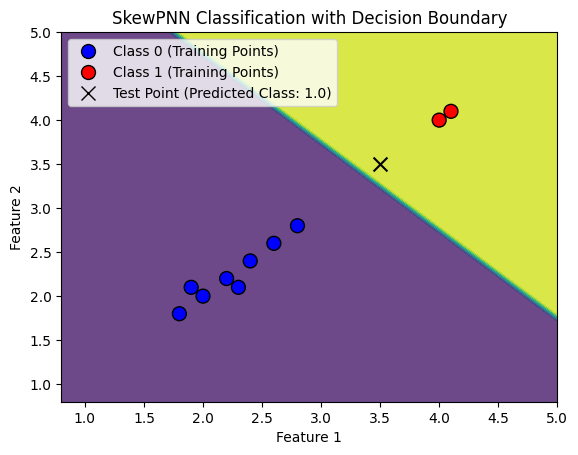

In [9]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training data points with different colors based on class
train_colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(
    X[:, 0], X[:, 1], c=train_colors, s=100, edgecolors='k', marker='o'
)

# Plot the query point with a specific color
plt.scatter(
    query_point[0], query_point[1],
    c='black', s=100, edgecolors='k', marker='x'
)

# Add a custom legend without extra lines
train_class_0 = mlines.Line2D([], [], color='blue', marker='o', markersize=10,
                               label='Class 0 (Training Points)', markeredgecolor='k', linestyle='None')
train_class_1 = mlines.Line2D([], [], color='red', marker='o', markersize=10,
                               label='Class 1 (Training Points)', markeredgecolor='k', linestyle='None')
test_point_marker = mlines.Line2D([], [], color='green', marker='x', markersize=10,
                                  label='Test Point (Predicted Class: {})'.format(predicted_class), markeredgecolor='k', linestyle='None')

plt.legend(handles=[train_class_0, train_class_1, test_point_marker], loc='upper left')

# Title and labels
plt.title("SkewPNN Classification with Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Display the plot
plt.show()
